In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data 


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set()

### a)

In [3]:
df_boston = load_data('Boston')

df_boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

### b)

In [4]:
df_boston.shape

(506, 13)

### Check https://islp.readthedocs.io/en/latest/datasets/Boston.html for the meaning of each attribute in the data set 

### c)

In [9]:
pred_list = df_boston.columns.drop('crim').tolist() # 'crim': crime rate per capita is the target

pred_list1 = pred_list[:6] + ['crim'] # 12 predictors expect the target 'crim'
pred_list2 = pred_list[6:] + ['crim']

In [10]:
sns.pairplot(df_boston[pred_list1], kind='scatter')

plt.show()

### indus (proportion of non-retail business acres per town), nox (nitrogen oxides concentration (parts per 10 million).) and age (proportion of owner-occupied units built prior to 1940.) all seem to have a relationship with crim. rm has no strong relationship

In [11]:
sns.pairplot(df_boston[pred_list2], kind='scatter')

plt.show()

### dis (weighted mean of distances to five Boston employment centres), rad (index of accessibility to radial highways), tax (full-value property-tax rate per $10,000.) medv (mdeian value of the owner occupied homes) are also good indicators of crim 

### d)

In [13]:
corr_boston = df_boston.corr()

max_corr_list = corr_boston['crim'].sort_values(ascending=False)

print(max_corr_list)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


### Top three winners are (in absolute value) is rad, tax, lstat!! 

In [14]:
df_boston['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

<Axes: xlabel='rad', ylabel='crim'>

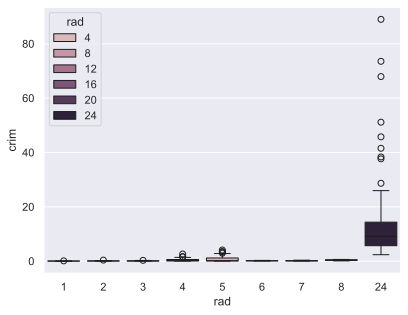

In [15]:
sns.boxplot(x='rad', y='crim', data=df_boston, hue = 'rad')

### When rad takes its maximal value crim jumps. 

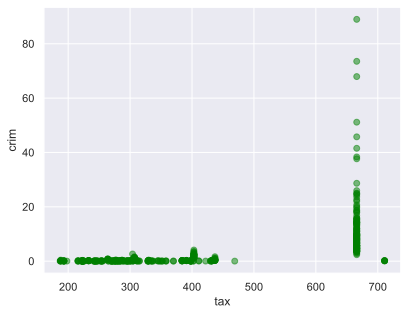

In [18]:
plt.scatter(df_boston['tax'], df_boston['crim'], color = 'green', alpha = 0.5)
plt.xlabel('tax')
plt.ylabel('crim')

### When tax is smaller than 500 crim rate is low, however at a value larger than 600 there are many data points with large crim rate!!!

Text(0, 0.5, 'crim')

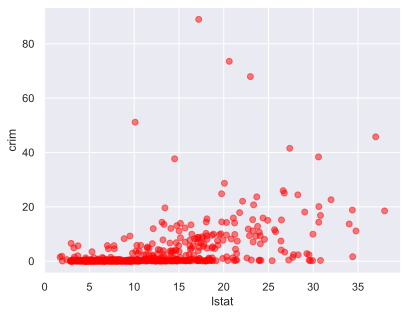

In [19]:
plt.scatter(df_boston['lstat'], df_boston['crim'], color = 'red', alpha = 0.5)
plt.xlabel('lstat')
plt.ylabel('crim')

### For lstat < 20 a large population of datapoints have zero crim though there are some data points with between 5-20 crim rate, for lstat > 20 there are more points with larger than 0 crim rate.

### e) Lets plot top three suburbs with respect to crim, tax and ptratio and compare mean of these attributes.

In [24]:
df_boston.loc[df_boston['crim'].nlargest(3).index]

crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
380     20.2  17.21  10.4  
418     20.2  20.62   8.8  
405     20.2  22.98   5.0

In [25]:
df_boston.loc[df_boston['tax'].nlargest(3).index]

crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
488  0.15086  0.0  27.74     0  0.609  5.454  92.7  1.8209    4  711     20.1   
489  0.18337  0.0  27.74     0  0.609  5.414  98.3  1.7554    4  711     20.1   
490  0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711     20.1   

     lstat  medv  
488  18.06  15.2  
489  23.97   7.0  
490  29.68   8.1

In [26]:
df_boston.loc[df_boston['ptratio'].nlargest(3).index]

crim    zn  indus  chas    nox     rm   age      dis  rad  tax  \
354  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4  334   
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   
127  0.25915   0.0  21.89     0  0.624  5.693  96.0   1.7883    4  437   

     ptratio  lstat  medv  
354     22.0   8.05  18.2  
355     22.0   5.57  20.6  
127     21.2  17.19  16.2

In [27]:
df_boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### The top 3 suburbs with the highest crim rate, also has high tax and ptratio values that are within the 75 percentile of these attributes. Crim rate for these suburbs are way to large, i.e away from the mean crim of the sample. The top 3 suburbs in terms of tax have below the average crim rate. All 3 suburbs have the maximal tax value of the sample. Same situation apply for the suburbs with the largest ptratio, they all have below the mean crim rates. 

### f)

In [28]:
df_boston.chas.unique()

array([0, 1])

In [33]:
### the suburbs that bound to the charles river has a label 1 

print(f"The number of suburbs that bound to the charles river: {df_boston.chas.value_counts()[1]}")

The number of suburbs that bound to the charles river: 35


### g)

In [34]:
print(f"Median pupil to teacher ratio: {df_boston.ptratio.median()}")

Median pupil to teacher ratio: 19.05


### h)

In [37]:
df_boston.loc[df_boston['medv'].nsmallest(1).index] # the suburbs with the smallest medv

crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0

In [38]:
df_boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### crim is above the 75 percentile, so relative to the other towns it has a high crim rate. zn is below the 75 percentile. It has an above mean INDUS and it does not bound the Charles river. Above mean (and above 75 percentile) noc, rm is below quantile 25%, maximum available age, dis near to the minimum value, maximum rad, tax in quantile 75%, ptratio as well.

 

### i)

In [45]:
print(f"Number of suburbs with more than (an average of) seven rooms per dwelling {len(df_boston[df_boston['rm']>7])}")
print("\n")
print(f"Number of suburbs with more than (an average of) seven rooms per dwelling {len(df_boston[df_boston['rm']>8])}")

Number of suburbs with more than (an average of) seven rooms per dwelling 64


Number of suburbs with more than (an average of) seven rooms per dwelling 13


In [43]:
df_boston[df_boston['rm']>8].describe()

crim         zn      indus       chas        nox         rm  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   

             age        dis        rad         tax    ptratio      lstat  \
count  13.000000  13.000000  13.000000   13.000000  13.000000  13.000000   
mean   71.538462   3.430192   7.461538  325.076923  16.361538   4.310000   
std    24.608723   1.883955   5.332532  110.971063   2.410580   1.373566   
min     8.400000   1.801000   2.000000  224.000000  13.000000   2.470000   
25%    70.400000   2.288500   5.000000  264.000000  14.700000   3.320000   
50%    78.300000   2.894400   7.000000  307.000000  17.400000   4.140000   
75%    86.500000   3.651900   8.000000  307.000000  17.400000   5.120000   
max    93.900000   8.906700  24.000000  666.000000  20.200000   7.440000   

            medv  
count  13.000000  
mean   44.200000  
std     8.092383  
min    21.900000  
25%    41.700000  
50%    48.300000  
75%    50.000000  
max    50.000000

In [44]:
df_boston.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### Suburbs with more than 8 rooms per dwelling has lower crim rates on average, industy proportion is also lower, ptratio (pupil to teacher ratio) is smaller, lstat (percentage lower status people) is 3 times smaller on average, median house value is twice as large compared to the total mean of the dataset. Index of accesibility to radial highways is also twice as large compared to the mean of the population. 